In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

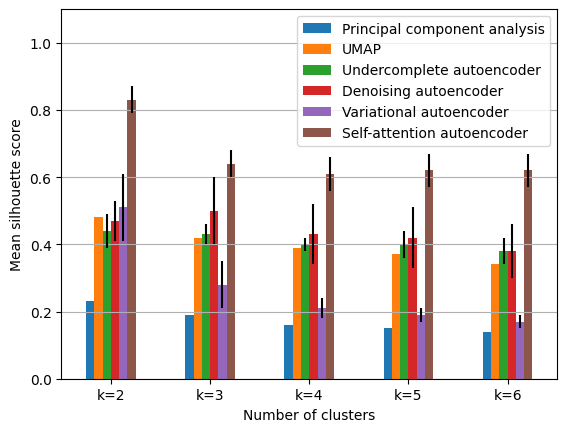

In [33]:
# --- Plot silhouette scores ---
# create dataframe
PCA = (0.23, 0.19, 0.16, 0.15, 0.14)
UMAP = (0.48, 0.42, 0.39, 0.37, 0.34)
AE = (0.44, 0.43, 0.40, 0.40, 0.38)
DAE = (0.47, 0.50, 0.43, 0.42, 0.38)
VAE = (0.51, 0.28, 0.21, 0.19, 0.17)
Attention_AE = (0.83, 0.64, 0.61, 0.62, 0.62)
index = ['k=2', 'k=3', 'k=4', 'k=5', 'k=6']
df = pd.DataFrame({'Principal component analysis': PCA,
                   'UMAP': UMAP,
                   'Undercomplete autoencoder': AE,
                   'Denoising autoencoder': DAE,
                   'Variational autoencoder': VAE,
                   'Self-attention autoencoder': Attention_AE,
                   # supply margin of error as standard deviation
                   'PCA_moe': (0, 0, 0, 0, 0),
                   'UMAP_moe': (0, 0, 0, 0, 0),
                   'AE_moe':   (0.05,  0.03, 0.02, 0.04, 0.04),
                   'DAE_moe': (0.06, 0.10, 0.09, 0.09, 0.08),
                   'VAE_moe': (0.10, 0.07, 0.03, 0.02, 0.02),
                   'Attention_AE_moe': (0.04, 0.04, 0.05, 0.05, 0.05)}, index=index)

# plot
ax = df[['Principal component analysis', 'UMAP', 'Undercomplete autoencoder', 'Denoising autoencoder', 'Variational autoencoder', 'Self-attention autoencoder']].plot.bar(rot=0)
plt.xlabel('Number of clusters')
plt.ylabel('Mean silhouette score')
plt.ylim(0, 1.1)
ax.yaxis.grid(True)

# bar_moes[i] is bar/patch i's margin of error, i.e., half the length of an
# errorbar centered at the bar's height
bar_moes = np.ravel(df[['PCA_moe', 'UMAP_moe', 'AE_moe', 'DAE_moe', 'VAE_moe', 'Attention_AE_moe']].values.T)
assert len(bar_moes) == len(ax.patches)

for patch, moe in zip(ax.patches, bar_moes):
    height = patch.get_height() # of bar
    min_y, max_y = height - moe, height + moe
    plt.vlines(patch.get_x() + patch.get_width()/2,
               min_y, max_y, color='k')

plt.savefig('silhouette_score_plot.png')

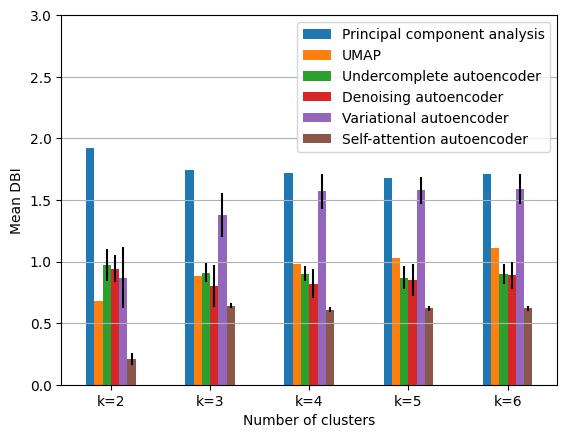

In [34]:
# --- Plot DBI scores ---
# create dataframe
PCA = (1.92, 1.74, 1.72, 1.68, 1.71)
UMAP = (0.68, 0.88, 0.98, 1.03, 1.11)
AE = (0.97, 0.91, 0.90, 0.87, 0.90)
DAE = (0.94, 0.80, 0.82, 0.85, 0.89)
VAE = (0.87, 1.38, 1.57, 1.58, 1.59)
Attention_AE = (0.21, 0.64, 0.61, 0.62, 0.62)
index = ['k=2', 'k=3', 'k=4','k=5', 'k=6']
df = pd.DataFrame({'Principal component analysis': PCA,
                   'UMAP': UMAP,
                   'Undercomplete autoencoder': AE,
                   'Denoising autoencoder': DAE,
                   'Variational autoencoder': VAE,
                   'Self-attention autoencoder': Attention_AE,
                   # supply margin of error as standard deviation
                   'PCA_moe': (0, 0, 0, 0, 0),
                   'UMAP_moe': (0, 0, 0, 0, 0),
                   'AE_moe':   (0.13,  0.08, 0.06, 0.09, 0.08),
                   'DAE_moe': (0.11, 0.17, 0.12, 0.13, 0.11),
                   'VAE_moe': (0.25, 0.18, 0.14, 0.11, 0.12),
                   'Attention_AE_moe': (0.05, 0.02, 0.02, 0.02, 0.02)}, index=index)

# plot
ax = df[['Principal component analysis', 'UMAP', 'Undercomplete autoencoder', 'Denoising autoencoder', 'Variational autoencoder', 'Self-attention autoencoder']].plot.bar(rot=0)
plt.xlabel('Number of clusters')
plt.ylabel('Mean DBI')
plt.ylim(0, 3)
ax.yaxis.grid(True)

# bar_moes[i] is bar/patch i's margin of error, i.e., half the length of an
# errorbar centered at the bar's height
bar_moes = np.ravel(df[['PCA_moe', 'UMAP_moe', 'AE_moe', 'DAE_moe', 'VAE_moe', 'Attention_AE_moe']].values.T)
assert len(bar_moes) == len(ax.patches)

for patch, moe in zip(ax.patches, bar_moes):
    height = patch.get_height() # of bar
    min_y, max_y = height - moe, height + moe
    plt.vlines(patch.get_x() + patch.get_width()/2,
               min_y, max_y, color='k')

plt.savefig('dbi_plot.png')

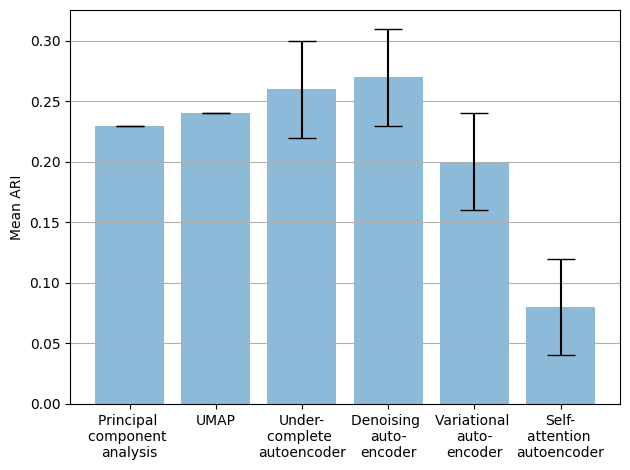

In [35]:
# --- Plot ARI scores ---
pca_mean = 0.23
umap_mean = 0.24
ae_mean = 0.26
dae_mean = 0.27
vae_mean = 0.20
attention_ae_mean = 0.08

pca_std = 0
umap_std = 0
ae_std = 0.04
dae_std = 0.04
vae_std = 0.04
attention_ae_std = 0.04

# Define labels, positions, bar heights and error bar heights
labels = ['Principal \ncomponent \nanalysis', 'UMAP', 'Under-\ncomplete \nautoencoder', 'Denoising \nauto-\nencoder', 'Variational \nauto-\nencoder', 'Self-\nattention \nautoencoder']
x_pos = np.arange(len(labels))
means = [pca_mean, umap_mean, ae_mean, dae_mean, vae_mean, attention_ae_mean]
error = [pca_std, umap_std, ae_std, dae_std, vae_std, attention_ae_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Mean ARI')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
#ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('ari_plot.png')
plt.show()
